In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read the results which are obtained from watch

In [ ]:
df = pd.DataFrame()
count = 50000

while(True):
    cur = pd.read_csv("../../data/global acc/result" + str(count) + ".csv", skipinitialspace=True, header=None)
    df = df.append(cur, ignore_index=True)
    if count == 500000:
        break
    count += 50000
cur = pd.read_csv("../../data/global acc/result_final.csv", skipinitialspace=True, header=None)
df = df.append(cur, ignore_index=True)

In [ ]:
len(df)

In [ ]:
df.columns = ['global_acc1','global_acc2','global_acc3']

## Add the time, tagname and tester_id into the df

In [ ]:
t = pd.DataFrame.from_csv("../../data/linear_acceleration_grav_mag.csv")
t.columns

In [ ]:
b = t[['tester_id', 'TagName', 'Time']].copy()
for col in ['global_acc1','global_acc2','global_acc3']:
    b[col] = 0

b[['global_acc1','global_acc2','global_acc3']] = df[['global_acc1','global_acc2','global_acc3']].values
b['unix_timestamp'] = pd.to_datetime(b['Time']).values.astype("uint64") / 1000000000
b.to_csv("../../data/global_acc_df.csv")

## Calculate distance and velocity

In [3]:
from scipy.integrate import simps

In [ ]:
b = pd.DataFrame.from_csv("../../data/global_acc_df.csv")
b.head()

In [4]:
features = pd.DataFrame(columns=['unix_timestamp','TagName','tester_id',
                                 'v_1','v_2','v_3','d_1',
                                          'd_2','d_3', 'global_acc1','global_acc2','global_acc3'])
b_groups = b.groupby(['TagName','tester_id'])
count = 0
for key in b_groups.groups.keys():
    cur_group = b_groups.get_group(key)
    t = cur_group.unix_timestamp.values
    v_1 = []
    d_1 = []
    v_2 = []
    d_2 = []
    v_3 = []
    d_3 = []
    acc1 = cur_group.global_acc1.values
    acc2 = cur_group.global_acc2.values
    acc3 = cur_group.global_acc3.values
    for i in range(len(t)):
        v_1.append(simps(0.8*acc1[:i+1], x=t[:i+1]))
    for i in range(len(t)):
        d_1.append(simps(v_1[:i+1], x=t[:i+1]))
    for i in range(len(t)):
        v_2.append(simps(0.8*acc2[:i+1], x=t[:i+1]))
    for i in range(len(t)):
        d_2.append(simps(v_2[:i+1], x=t[:i+1]))
    for i in range(len(t)):
        v_3.append(simps(0.8*acc3[:i+1], x=t[:i+1]))
    for i in range(len(t)):
        d_3.append(simps(v_3[:i+1], x=t[:i+1]))
    
    v_1 = np.array(v_1)
    d_1 = np.array(d_1)
    v_2 = np.array(v_2)
    d_2 = np.array(d_2)
    v_3 = np.array(v_3)
    d_3 = np.array(d_3)

    temp_df = pd.DataFrame()
    temp_df['unix_timestamp'] = t
    temp_df['TagName'] = np.array([key[0]]*len(t))
    temp_df['tester_id'] = np.array([key[1]]*len(t))
                                                           
        
    temp_df['v_1'] = v_1
    temp_df['v_2'] = v_2
    temp_df['v_3'] = v_3
    
    temp_df['d_1'] = d_1                                       
    temp_df['d_2'] = d_2
    temp_df['d_3'] = d_3
    temp_df['global_acc1'] = acc1
    temp_df['global_acc2'] = acc2
    temp_df['global_acc3'] = acc3

    features = features.append(temp_df, ignore_index=True)
    count+=1
    if (count%50==0):
        print(count)

    

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000


In [5]:
features.head()

,unix_timestamp,TagName,tester_id,v_1,v_2,v_3,d_1,d_2,d_3,global_acc1,global_acc2,global_acc3
0,1.515398e+09,Tag0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-0.058561,-0.130082,-0.520824
1,1.515398e+09,Tag0,0.0,-0.000073,-0.000388,-0.002020,-1.834992e-07,-9.703653e-07,-0.000005,0.021859,-0.064001,-0.489335
2,1.515398e+09,Tag0,0.0,0.000035,-0.000564,-0.004001,-4.303650e-07,-3.528084e-06,-0.000020,-0.002340,-0.037200,-0.522459
3,1.515398e+09,Tag0,0.0,-0.000160,-0.000652,-0.006500,-5.877165e-07,-7.142123e-06,-0.000052,-0.070036,0.008021,-0.501289
4,1.515398e+09,Tag0,0.0,-0.000465,-0.000570,-0.008448,-2.219124e-06,-1.039287e-05,-0.000089,-0.069951,0.008737,-0.501289


In [13]:
features.to_csv("../../data/global_acc_features_df.csv")

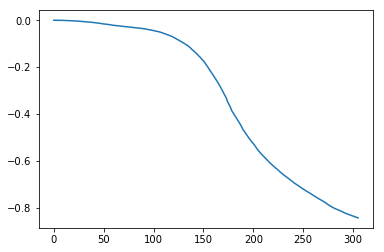

In [7]:
# user0 = features[features.tester_id == 5.0]
# user0_action_1 = user0[user0.TagName == 'Tag1']
# # x, = plt.plot(user0_action_1.d_1.values, label = 'x-axis')
# # y, = plt.plot(user0_action_1.d_2.values, label = 'y-axis')
# z, = plt.plot(user0_action_1.d_3.values, label = 'z-axis')
# # plt.title("Example Accelerometer Sensor Reading of Gesture 4")
# # plt.legend(handles=[x,y,z])
# # plt.savefig('/Users/Ageha/Desktop/acc_gesture4.png')
# plt.show()